## Assignment 2 : Machine Learning

I chose a regression algorithm for predicting the number of passengers on a specific date for a specific bus because the output variable, (the number of passengers), is a continuous numerical value, and the goal is to make quantitative predictions (predictions that provide specific numerical values as outcomes). 

Regression algorithms are well-suited for these tasks as they are designed to model and predict numerical outcomes. By using regression, we aim to find a mathematical relationship between the input variables (date) and the target variable (number of passengers), allowing us to make accurate, data-driven predictions.

In [196]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import datetime

## Data Preparation

In [197]:
# Load dataset
url = "data\Ruter-data.csv"
df = pd.read_csv(url, sep=";")
df = df[["Dato", "Linjenavn", "Passasjerer_Ombord"]]
df = df.dropna()

In [198]:
# Look at the dataset
df.head()

,Dato,Linjenavn,Passasjerer_Ombord
0,10/08/2020,150,5
1,15/08/2020,150,5
2,03/08/2020,150,6
3,27/07/2020,150,10
4,27/08/2020,150,10


In [199]:
# Look at dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Dato                6000 non-null   object
 1   Linjenavn           6000 non-null   object
 2   Passasjerer_Ombord  6000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


In [200]:
# Look at statistics for each numerical column in the dataset
df.describe()

,Passasjerer_Ombord
count,6000.000000
mean,4.512833
std,6.735730
min,-39.000000
25%,0.000000
50%,3.000000
75%,7.000000
max,64.000000


<Axes: xlabel='Dato', ylabel='Passasjerer_Ombord'>

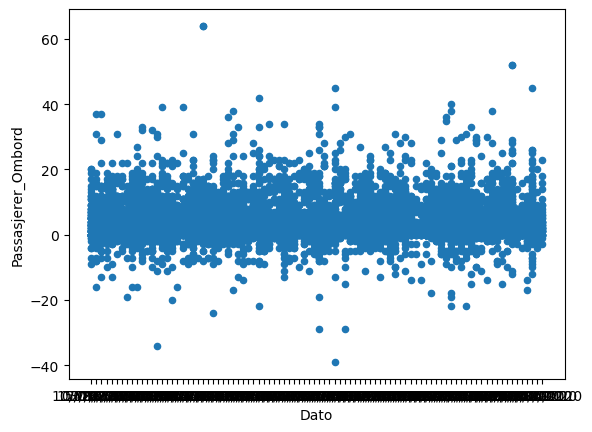

In [201]:
df.plot.scatter(x = 'Dato', y = 'Passasjerer_Ombord')

In [202]:
# We see in df.describe and df.plot that the minimum value of passengers on board is below zero
# Since this is not a possible value for the number of passengers, I'm going to drop all data points with passengers on board less than 0
df = df[df["Passasjerer_Ombord"]>=0]
df.describe()

,Passasjerer_Ombord
count,5333.000000
mean,5.601163
std,6.160011
min,0.000000
25%,1.000000
50%,4.000000
75%,8.000000
max,64.000000


In [203]:
# In order to create a model with the most accuracy from this data set, I want to use the route that occurs most often in the data set
df["Linjenavn"].describe()

count     5333
unique     148
top        100
freq       423
Name: Linjenavn, dtype: object

In [204]:
# Count the occurrences of each unique Linjenavn
lineCounts = df["Linjenavn"].value_counts()

# Find the line with the most datapoints
mostCommonLine = lineCounts.idxmax()
mostCommonLineCount = lineCounts.max()

# Print the result
print(f"Most common line : {mostCommonLine}\nAmount of data : {mostCommonLineCount}")

Most common line : 100
Amount of data : 423


In [205]:
# The chosen line for this assignment, is line number 100, as assigned to 'mostCommonLine'
df = df[df["Linjenavn"] == mostCommonLine]
df.describe()

,Passasjerer_Ombord
count,423.000000
mean,8.513002
std,7.599838
min,0.000000
25%,3.000000
50%,7.000000
75%,12.000000
max,40.000000


## Data Processing and Analysis

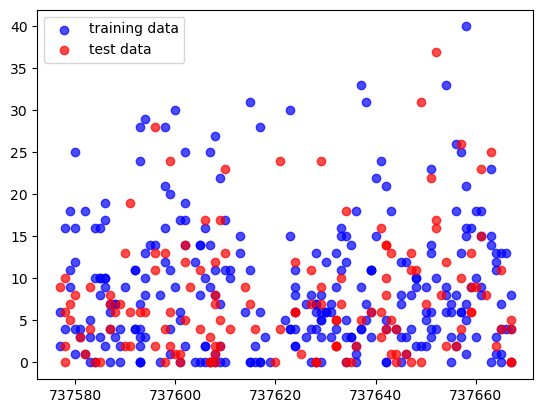

In [210]:
# Convert dates
df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y')

# Setup XY axis
X = df['Dato'].apply(lambda x: x.toordinal())  
Y = df['Passasjerer_Ombord'].values

# Split the data into training and testing sets (e.g., 80% for training, 20% for testing)
trainRatio = 0.67
testRatio = 0.33

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1,1), Y, test_size=testRatio, random_state=42)

# Visualize
plt.scatter(X_train, Y_train, label="training data", alpha=0.7, color='blue')
plt.scatter(X_test, Y_test, label="test data", alpha=0.7, color='red')
plt.legend()
plt.show()

In [218]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train,Y_train)

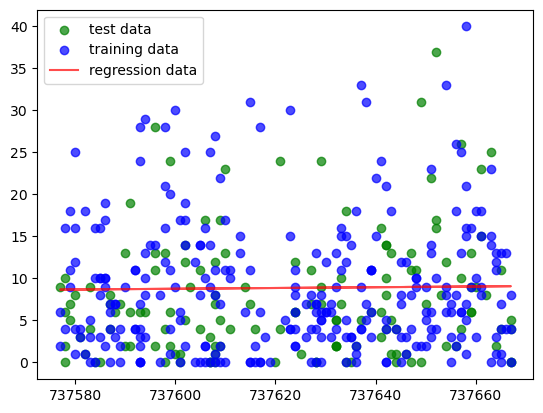

Mean Squared Error for training data = 59.9139761348433


In [219]:
Y_pred = linearRegressor.predict(X_train)
plt.scatter(X_test, Y_test, label="test data", alpha=0.7, color='green')
plt.scatter(X_train, Y_train, label="training data", alpha=0.7, color='blue')

plt.plot(X_train, Y_pred, label="regression data", alpha=0.7, color="red")
plt.legend()
plt.show()

mseTrain = metrics.mean_squared_error(Y_train, linearRegressor.predict(X_train))
print(f'Mean Squared Error for training data = {mseTrain}')

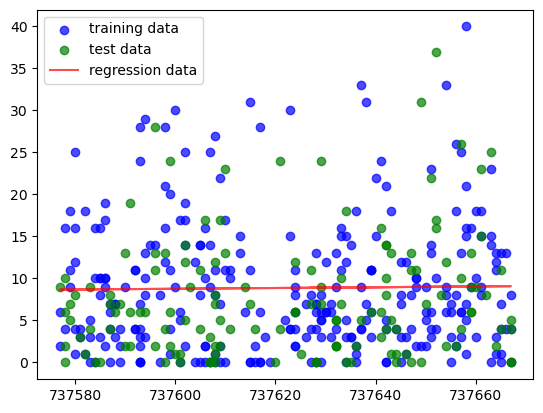

Mean Squared Error: 53.09933763366704


In [220]:
Y_pred = linearRegressor.predict(X_test)
plt.scatter(X_train, Y_train, label="training data", alpha=0.7, color='blue')
plt.scatter(X_test, Y_test, label="test data", alpha=0.7, color='green')

plt.plot(X_test, Y_pred, label="regression data", alpha=0.7, color="red")
plt.legend()
plt.show()

mse = metrics.mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

In [222]:
r2 = r2_score(Y_test, Y_pred)
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: -0.018526836162160443


In [ ]:
df.corr()

,Dato,Linjenavn,Passasjerer_Ombord
Dato,1.000000,NaN,0.060001
Linjenavn,NaN,NaN,NaN
Passasjerer_Ombord,0.060001,NaN,1.000000
